In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split as tts

In [2]:
class Dataset:
    def __init__(self, *args, **kwargs):
        self.data_arrays = self.generate()

    def generate(self):
        raise NotImplementedError

    def train_test_split(self, testSize = 0.3, randomState = 0):
        return tts(*self.data_arrays, test_size=testSize, random_state=randomState)

class CannabisGenotype(Dataset):
    def generate(self):
        X, y = [], []
        with open("data/cannabis_gen.csv", "r") as data:
            head = True
            for line in data:
                if not head:
                    seq = line.split(',')
                    y.append(int(seq[-1][1:-2]))
                    X.append([int(x.strip()) for x in seq[1:-1]])
                else:
                    head = False
        X, y = np.array(X), np.array(y)
        return X, y

In [3]:
data = CannabisGenotype()
X_train, X_test, y_train, y_test = data.train_test_split()

In [4]:
data = pd.read_csv('data/cannabis_gen.csv')

In [5]:
data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V165,V166,V167,V168,V169,V170,V171,V172,V173,drug
0,UN_01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,UN_02,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,UN_03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,UN_04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,UN_05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [33]:
values = []
for i in range(len(data)) : 
    if i != 0:
        a = pd.factorize(data.iloc[i,1:173])[0]
        b = np.zeros((a.size, a.max()+1))
        b[np.arange(a.size),a] = 1
        values.append(np.concatenate(b))

one_hot = pd.DataFrame(values)
one_hot['ID'] = data['ID']
one_hot['drug'] = data['drug']

one_hot

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,ID,drug
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,UN_01,-1
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,UN_02,-1
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,UN_03,-1
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,UN_04,-1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,UN_05,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,RI_19,1
1319,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,RI_20,1
1320,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,RI_21,1
1321,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,RI_22,1


In [8]:
# Afegir la familia(espècie) de cada planta

family = list(data['ID'])
for i in range(0, len(family)):
    family[i] = family[i].split('_')[0]
data['family'] = family

In [95]:
# Calcular centroides per cada familia

df = data.drop('ID', axis=1)
df = df.groupby(['family']).sum()
for column in df:
    df[column] = df[column] / abs(df['drug'])
centroid =  df.to_numpy()

In [59]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9422110552763819

In [110]:
# CUSTOM KERNELS

def elk(X, Y):
    xm, xn = X.shape
    ym, yn = Y.shape
    # Compute the kernel matrix:
    G = np.zeros((xm, ym))
    for i in range(xm):
        Xi = np.tile(X[i], (ym, 1))
        Xi = np.sqrt(Xi == Y) # prevf f1
        G[i, :] = np.sum(Xi, axis=1)
    return G # postf f2 f2(G)

def k0(X, Y):
    xm, xn = X.shape
    ym, yn = Y.shape
    # Compute the kernel matrix:
    G = np.zeros((xm, ym))
    for i in range(xm):
        Xi = np.tile(X[i], (ym, 1))
        Xi = Xi == Y # prevf
        G[i, :] = np.sum(Xi, axis=1)
    return G # postf f(G)



def null(X,Y):
    return 1

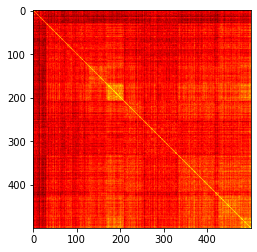

In [36]:
# heatmap del kernel linear
df = one_hot 
if 'family' in df.columns:
    df_matrix = df.drop('ID', axis=1).drop('drug', axis=1).drop('family', axis=1)
    
else:
    df_matrix = df.drop('ID', axis=1).drop('drug', axis=1)
    
df_matrix = df_matrix.to_numpy()
    
size = 500

kernel_matrix = np.empty([size, size])

for i in range(0, size):
    for j in range(0, size):
        X = df_matrix[i].reshape(1, -1)
        Y = df_matrix[j].reshape(1, -1)
        kernel_matrix[i][j] = int(sklearn.metrics.pairwise.linear_kernel(X,Y))


plt.imshow(kernel_matrix, cmap='hot')
plt.show()

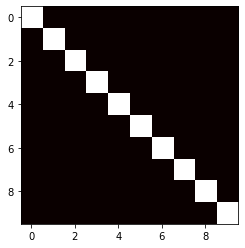

In [54]:
# heatmap del kernel rbf (????)

df_matrix = data.drop('ID', axis=1).drop('drug', axis=1).drop('family', axis=1)
df_matrix = df_matrix.to_numpy()

size = 10

kernel_matrix = np.empty([size, size])

for i in range(0, size):
    for j in range(0, size):
        X = df_matrix[i].reshape(1, -1)
        Y = df_matrix[j].reshape(1, -1)
        kernel_matrix[i][j] = int(sklearn.metrics.pairwise.rbf_kernel(X,Y))


plt.imshow(kernel_matrix, cmap='hot')
plt.show()

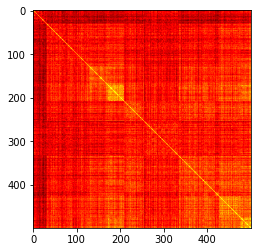

In [74]:
# elk kernel

df_matrix = data.drop('ID', axis=1).drop('drug', axis=1).drop('family', axis=1)
df_matrix = df_matrix.to_numpy()

size = 500

kernel_matrix = np.empty([size, size])

for i in range(0, size):
    for j in range(0, size):
        X = df_matrix[i].reshape(1, -1)
        Y = df_matrix[j].reshape(1, -1)
        kernel_matrix[i][j] = int(k0(X,Y))


plt.imshow(kernel_matrix, cmap='hot')
plt.show()

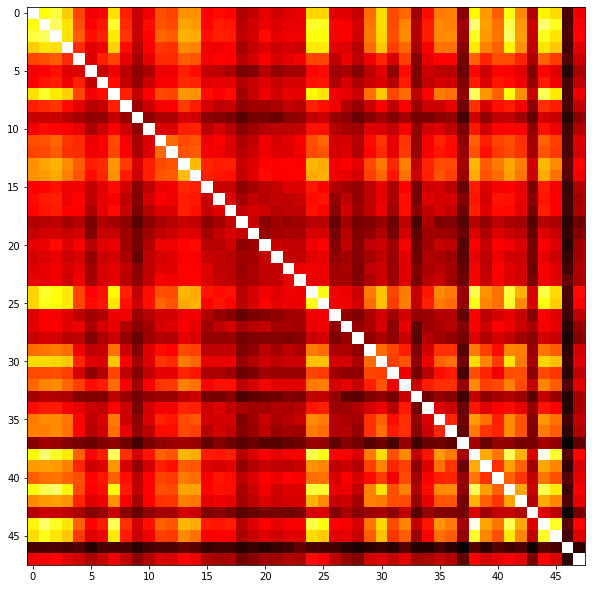

In [108]:
# proves amb nomes les families
df_matrix = centroid

size = len(df_matrix)

kernel_matrix = np.empty([size, size])

for i in range(0, size):
    for j in range(0, size):
        X = df_matrix[i].reshape(1, -1)
        Y = df_matrix[j].reshape(1, -1)
        kernel_matrix[i][j] = int(elk(X,Y))

plt.figure(figsize = (10,20))
labels = range(0, 48, 5)
plt.imshow(kernel_matrix, cmap='hot')
plt.xticks(labels)
plt.yticks(labels)
plt.show()